In [60]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import requests
from citipy import citipy
from datetime import datetime

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Big NOTE - You can only unzip a zipped tuple ***once*** before it is removed from the computer's memory
# If you run it a second time it will clear your list because you are unzipping a blank list -the memory was cleared after the initial unpacking!
coordinates

[(-6.543691484898801, 74.62770910513024),
 (-40.94272518360052, -79.64984233147662),
 (-21.897441736443866, -148.56430643687983),
 (39.376299450725526, 92.05899245520703),
 (28.892277782475347, 126.8436916520015),
 (0.8441590618159722, -110.88734837783417),
 (-68.44454750358732, 18.329322557994686),
 (51.09909076868482, 16.88866942046866),
 (-31.447400822587518, 144.3176991327017),
 (37.37174694515453, -162.7383532965988),
 (-60.186413079090656, -102.05518178737935),
 (-47.24133760824252, -148.96964833516645),
 (62.342359852699644, -47.06029106934969),
 (88.86453195781883, 24.708964754633456),
 (-89.13942971725136, -52.27344607510649),
 (83.75911819722762, 97.13855780316402),
 (-89.31779199156347, 114.23327525790154),
 (-66.61099606262917, 91.66055875736049),
 (87.86377643395312, 49.30668044947885),
 (-40.01587880859421, 16.471306581447465),
 (-46.343273476955964, -150.5667034709741),
 (-18.665493238456293, 69.82514692163264),
 (-14.913924557928567, -158.61392297004426),
 (25.452895896

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [6]:
cities

['hithadhoo',
 'ancud',
 'mataura',
 'hami',
 'nago',
 'ixtapa',
 'bredasdorp',
 'wroclaw',
 'broken hill',
 'kapaa',
 'punta arenas',
 'qaqortoq',
 'longyearbyen',
 'ushuaia',
 'khatanga',
 'albany',
 'busselton',
 'belushya guba',
 'hermanus',
 'grand river south east',
 'avarua',
 'naze',
 'tual',
 'fare',
 'pangobilian',
 'kutum',
 'constantine',
 'georgetown',
 'jamestown',
 'ribeira grande',
 'muravlenko',
 'salinas',
 'port hedland',
 'vangaindrano',
 'arcos',
 'ahipara',
 'mar del plata',
 'marfino',
 'taolanaro',
 'lyambir',
 'cape town',
 'coihaique',
 'ilulissat',
 'upernavik',
 'castro',
 'carlsbad',
 'faanui',
 'barentsburg',
 'hilo',
 'bethel',
 'atuona',
 'capao da canoa',
 'dikson',
 'sarakhs',
 'grandview',
 'bluff',
 'suzu',
 'arraial do cabo',
 'san cristobal',
 'chone',
 'port elizabeth',
 'surt',
 'barrow',
 'xining',
 'aksarka',
 'crotone',
 'new norfolk',
 'sarh',
 'talnakh',
 'hobart',
 'chapais',
 'thinadhoo',
 'kloulklubed',
 'karakendzha',
 'chokurdakh',
 'ma

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | ancud
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | hami
Processing Record 5 of Set 1 | nago
Processing Record 6 of Set 1 | ixtapa
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | wroclaw
Processing Record 9 of Set 1 | broken hill
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | qaqortoq
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | khatanga
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 21 of Set 1 | avarua
Processing Record 22 

Processing Record 35 of Set 4 | bonavista
Processing Record 36 of Set 4 | corinto
Processing Record 37 of Set 4 | bo rai
Processing Record 38 of Set 4 | moussoro
Processing Record 39 of Set 4 | kavaratti
Processing Record 40 of Set 4 | carballo
Processing Record 41 of Set 4 | ponta do sol
Processing Record 42 of Set 4 | rio grande
Processing Record 43 of Set 4 | coahuayana
Processing Record 44 of Set 4 | huanan
Processing Record 45 of Set 4 | cotacachi
Processing Record 46 of Set 4 | bismarck
Processing Record 47 of Set 4 | tyukhtet
Processing Record 48 of Set 4 | zhashkiv
Processing Record 49 of Set 4 | iralaya
Processing Record 50 of Set 4 | atbasar
Processing Record 1 of Set 5 | changqing
Processing Record 2 of Set 5 | ayolas
Processing Record 3 of Set 5 | lillooet
Processing Record 4 of Set 5 | ongandjera
Processing Record 5 of Set 5 | yellowknife
Processing Record 6 of Set 5 | san quintin
Processing Record 7 of Set 5 | guican
Processing Record 8 of Set 5 | saint-louis
Processing R

Processing Record 25 of Set 8 | san pedro
Processing Record 26 of Set 8 | palmer
Processing Record 27 of Set 8 | nosy varika
Processing Record 28 of Set 8 | zhirnov
Processing Record 29 of Set 8 | sumbe
Processing Record 30 of Set 8 | meyungs
City not found. Skipping...
Processing Record 31 of Set 8 | ngunguru
Processing Record 32 of Set 8 | tela
Processing Record 33 of Set 8 | tula
Processing Record 34 of Set 8 | kiruna
Processing Record 35 of Set 8 | marawi
Processing Record 36 of Set 8 | romny
Processing Record 37 of Set 8 | angoche
Processing Record 38 of Set 8 | viesca
Processing Record 39 of Set 8 | jacareacanga
Processing Record 40 of Set 8 | onega
Processing Record 41 of Set 8 | makungu
Processing Record 42 of Set 8 | machico
Processing Record 43 of Set 8 | mindelo
Processing Record 44 of Set 8 | sabang
Processing Record 45 of Set 8 | kiama
Processing Record 46 of Set 8 | esso
Processing Record 47 of Set 8 | omboue
Processing Record 48 of Set 8 | imeni poliny osipenko
Processin

Processing Record 12 of Set 12 | nampula
Processing Record 13 of Set 12 | halalo
City not found. Skipping...
Processing Record 14 of Set 12 | mackenzie
Processing Record 15 of Set 12 | saint anthony
Processing Record 16 of Set 12 | karamay
City not found. Skipping...
Processing Record 17 of Set 12 | sovetskiy
Processing Record 18 of Set 12 | lolua
City not found. Skipping...
Processing Record 19 of Set 12 | arki
Processing Record 20 of Set 12 | sugod
Processing Record 21 of Set 12 | agde
Processing Record 22 of Set 12 | eregli
Processing Record 23 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 24 of Set 12 | harboore
Processing Record 25 of Set 12 | kenai
Processing Record 26 of Set 12 | sanmihaiu de campie
City not found. Skipping...
Processing Record 27 of Set 12 | tevriz
Processing Record 28 of Set 12 | aimores
Processing Record 29 of Set 12 | namibe
Processing Record 30 of Set 12 | nakhodka
Processing Record 31 of Set 12 | bairiki
Processing Record 32 of Set 12 

In [9]:
# Confirm how many rows with data
len(city_data)

567

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.6000,73.0833,82.65,70,30,6.69,MV,2022-02-02 14:25:38
1,Ancud,-41.8697,-73.8203,64.22,83,100,2.26,CL,2022-02-02 14:25:38
2,Mataura,-46.1927,168.8643,58.98,99,100,5.01,NZ,2022-02-02 14:25:38
3,Hami,42.8000,93.4500,24.21,30,91,3.11,CN,2022-02-02 14:25:39
4,Nago,26.5881,127.9761,66.27,87,100,8.32,JP,2022-02-02 14:25:39
5,Ixtapa,20.7000,-105.2000,61.23,88,0,4.61,MX,2022-02-02 14:25:39
6,Bredasdorp,-34.5322,20.0403,83.52,48,46,17.27,ZA,2022-02-02 14:25:40
7,Wroclaw,51.1000,17.0333,41.72,88,75,11.01,PL,2022-02-02 14:25:34
8,Broken Hill,-31.9500,141.4333,62.31,45,0,10.36,AU,2022-02-02 14:25:40
9,Kapaa,22.0752,-159.3190,70.12,72,75,1.01,US,2022-02-02 14:25:40


In [11]:
# Arrange column order
column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
# Arrange column order
city_data_df = city_data_df[column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hithadhoo,MV,2022-02-02 14:25:38,-0.6000,73.0833,82.65,70,30,6.69
1,Ancud,CL,2022-02-02 14:25:38,-41.8697,-73.8203,64.22,83,100,2.26
2,Mataura,NZ,2022-02-02 14:25:38,-46.1927,168.8643,58.98,99,100,5.01
3,Hami,CN,2022-02-02 14:25:39,42.8000,93.4500,24.21,30,91,3.11
4,Nago,JP,2022-02-02 14:25:39,26.5881,127.9761,66.27,87,100,8.32


In [13]:
# Create the output file (CSV).
output_data_file = "../World_Weather_Analysis/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

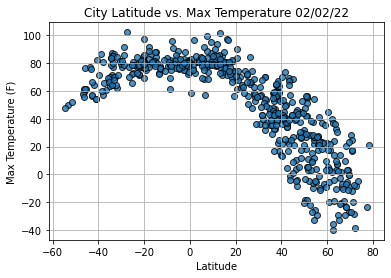

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("../World_Weather_Analysis/Fig1.png")

# Show plot.
plt.show()

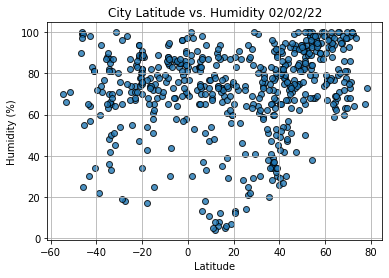

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("../World_Weather_Analysis/Fig2.png")
# Show plot.
plt.show()

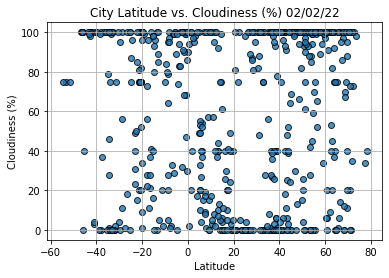

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("../World_Weather_Analysis/Fig3.png")
# Show plot.
plt.show()

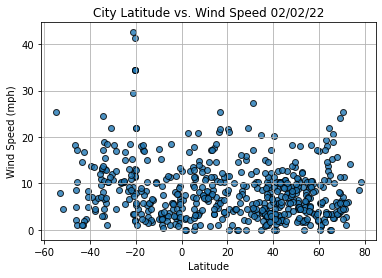

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("../World_Weather_Analysis/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

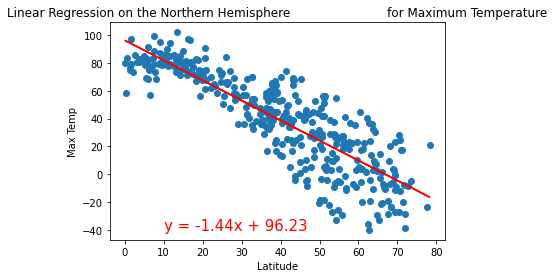

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-40))

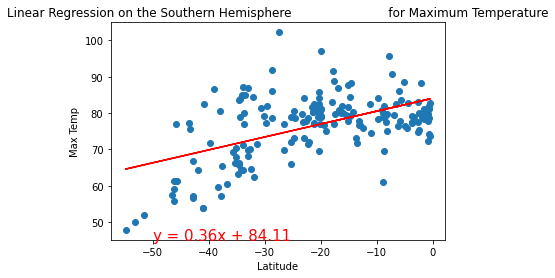

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,45))

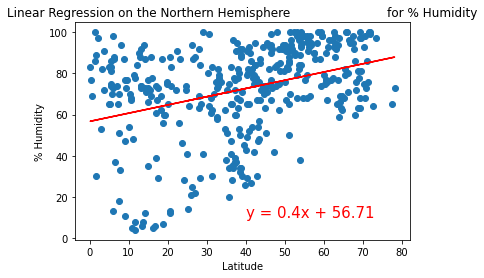

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

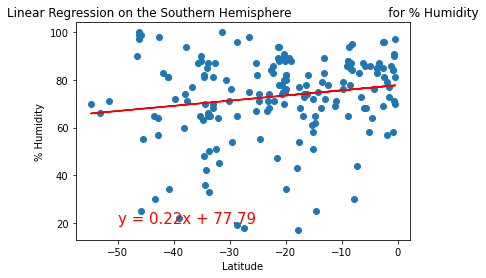

In [35]:
# plot the data.

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,20))

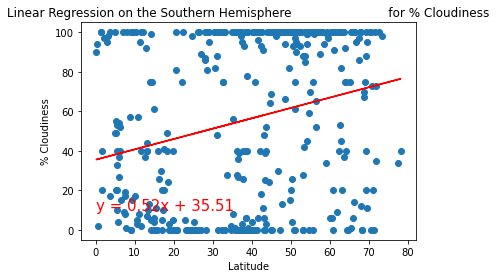

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,10))

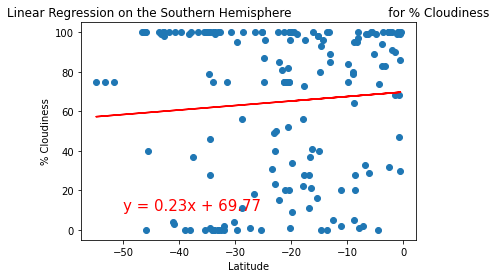

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,10))

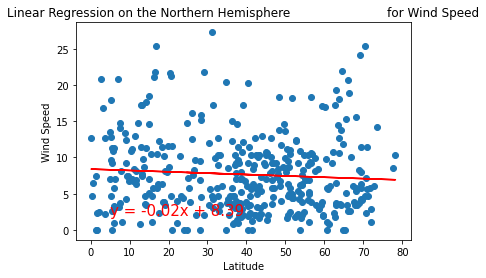

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(5,2))

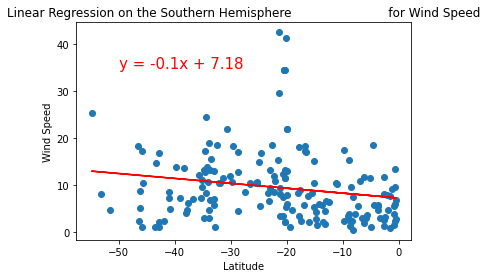

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))